In [ ]:
import pandas as pd
!pip install ortools
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt # Data visualization
import random
import numpy as np
import matplotlib.patches as patches
KOLORS= ['#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39',
    '#e7ba52', '#e7cb94', '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#a55194', '#ce6dbd', '#de9ed6',
    '#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2', '#31a354', '#74c476',
    '#a1d99b', '#c7e9c0', '#756bb1', '#9e9ac8', '#bcbddc', '#dadaeb', '#636363', '#969696', '#bdbdbd', '#d9d9d9',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c'
]

In [ ]:
df= pd.DataFrame()
N = 2000
nodes = range(N)
df['X'] = [random.random() for n in nodes]
df['Y'] = [random.random() for n in nodes]


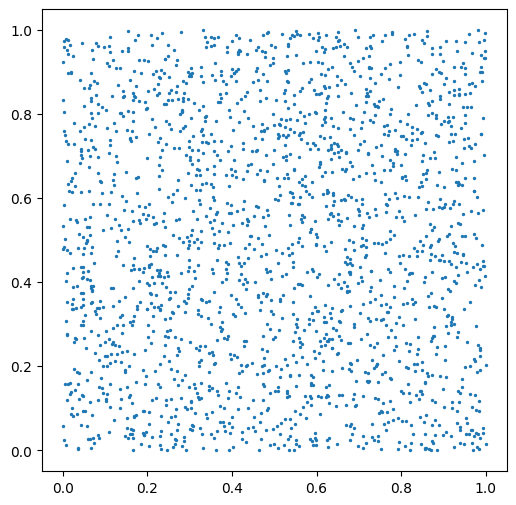

In [ ]:
plt.figure(figsize=(6,6))

X = df['X']
Y = df['Y']
plt.scatter(X,Y, s= 2)
n,m = 2,2

In [ ]:
def get_rectangle_coordinates(rows, columns):
    rectangles = []
    width = 1 / columns
    height = 1 / rows

    for i in range(rows):
        for j in range(columns):
            bottom_left_x = j * width
            bottom_left_y = i * height
            top_right_x = (j + 1) * width
            top_right_y = (i + 1) * height
            rectangles.append((bottom_left_x, bottom_left_y, top_right_x, top_right_y))

    return rectangles

# Example usage for a 2x2 grid
rectangles = get_rectangle_coordinates(8, 8)



def inside(rectangle, point):
    bottom_left_x, bottom_left_y, top_right_x, top_right_y = rectangle
    x, y = point
    return bottom_left_x <= x <= top_right_x and bottom_left_y <= y <= top_right_y

# Example usage
rectangle = (0.0, 0.0, 0.5, 0.5)
point_inside = (0.25, 0.25)
point_outside = (0.75, 0.75)

print(inside(rectangle, point_inside))  # Output: True

rects ={r:rectangles[r]  for r in range(len(rectangles))}
nodes = {n:(df.loc[n,'X'],df.loc[n,'Y']) for n in range(N)}

rects, nodes


data = {}
for n in nodes:
  for rec_n,rect in rects.items():
    if inside(rect, nodes[n]):
      rn= rec_n
  data[n]=(nodes[n][0],nodes[n][1],rn)

def dist(pos_i, pos_j):
  x1,y1 = pos_i[0],pos_i[1]
  x2,y2 = pos_j[0],pos_j[1]
  return int(1000*np.sqrt( (x1-x2)**2 +(y1-y2)**2))

True


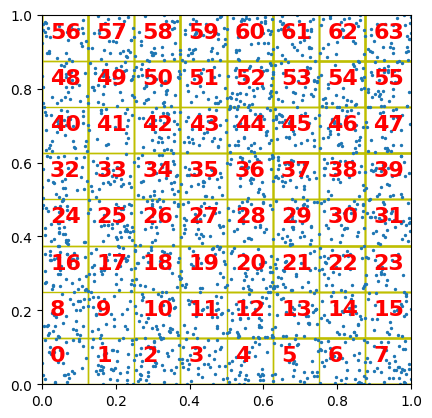

In [ ]:
fig, ax = plt.subplots()
for r, (x1,y1,x2,y2) in rects.items():
  rect_n = patches.Rectangle((x1, y1), x2, y2, linewidth=1, edgecolor='y', facecolor='none')
  ax.add_patch(rect_n)
  xm,ym = 0.5*(x1+x2), 0.5*(y1+y2)
  plt.text(xm-0.04,ym, s= str(r), fontsize=16, fontweight='bold', c='r')
# Set limits and show plot
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect('equal')
plt.scatter(X,Y, s= 2)

{0: [1, 8],
 1: [9, 0],
 2: [3, 10],
 3: [11, 2],
 4: [5, 12],
 5: [6, 4],
 6: [7, 5],
 7: [15, 6],
 8: [0, 16],
 9: [10, 1],
 10: [2, 9],
 11: [12, 3],
 12: [4, 11],
 13: [21, 14],
 14: [13, 15],
 15: [14, 7],
 16: [8, 17],
 17: [16, 18],
 18: [17, 19],
 19: [18, 20],
 20: [19, 28],
 21: [22, 13],
 22: [23, 21],
 23: [31, 22],
 24: [25, 32],
 25: [26, 24],
 26: [27, 25],
 27: [28, 26],
 28: [20, 27],
 29: [37, 30],
 30: [29, 31],
 31: [30, 23],
 32: [24, 33],
 33: [32, 41],
 34: [42, 35],
 35: [34, 36],
 36: [35, 44],
 37: [38, 29],
 38: [39, 37],
 39: [47, 38],
 40: [41, 48],
 41: [33, 40],
 42: [43, 34],
 43: [51, 42],
 44: [36, 45],
 45: [44, 53],
 46: [54, 47],
 47: [46, 39],
 48: [40, 56],
 49: [57, 50],
 50: [49, 58],
 51: [52, 43],
 52: [60, 51],
 53: [45, 61],
 54: [55, 46],
 55: [63, 54],
 56: [48, 57],
 57: [56, 49],
 58: [50, 59],
 59: [58, 60],
 60: [59, 52],
 61: [53, 62],
 62: [61, 63],
 63: [62, 55]}

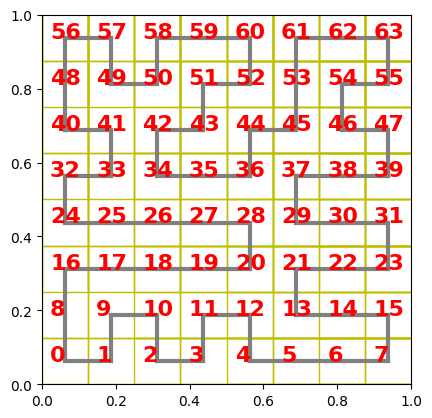

In [ ]:
node_centers = [r for r in rects]
pos = {}
for r, (x1,y1,x2,y2) in rects.items():
  xm,ym = 0.5*(x1+x2), 0.5*(y1+y2)
  pos[r]=(xm,ym)

model = cp_model.CpModel()
solver = cp_model.CpSolver()

U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}")  for i in node_centers for j in node_centers if i!=j}
arcs = [(i,j,v) for (i,j),v in U.items() ]
model.AddCircuit(arcs)
# Maximize x
expressions = [v*dist(pos[i],pos[j]) for (i,j),v in U.items() ]
model.Minimize(sum(expressions))
solver.Solve(model)

fig, ax = plt.subplots()
for r, (x1,y1,x2,y2) in rects.items():
  rect_n = patches.Rectangle((x1, y1), x2, y2, linewidth=1, edgecolor='y', facecolor='none')
  ax.add_patch(rect_n)
  xm,ym = 0.5*(x1+x2), 0.5*(y1+y2)
  plt.text(xm-0.04,ym, s= str(r), fontsize=16, fontweight='bold', c='r')
# Set limits and show plot
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect('equal')


in_out = {r:[None,None] for r, (x1,y1,x2,y2) in rects.items()}
for (i,j),v in U.items():
  if solver.value(v)>0:
    x1,y1 = pos[i][0], pos[i][1]
    x2,y2 = pos[j][0], pos[j][1]
    plt.plot([x1,x2],[y1,y2], lw= 3, c='grey')
    in_out[i][0]=j
    in_out[j][1]=i


in_out

In [ ]:
selected_nodes = {r:[] for r in rects}
connect = {}
for r, (rn1,rn2) in in_out.items():
  nodes_r = [n for n in data if data[n][2]== r]
  nodes_rn1 = [n for n in data if data[n][2]== rn1]
  nodes_rn2 = [n for n in data if data[n][2]== rn2]
  dr_nr1 = {(i,j):dist(data[i][0:2],data[j][0:2] ) for i in nodes_r for j in nodes_rn1}
  (i, j) = min(dr_nr1, key=dr_nr1.get)
  selected_nodes[r]+=[i]
  selected_nodes[rn1]+=[j]
  connect[r,rn1] = [i,j]


  dr_nr2 = {(i,j):dist(data[i][0:2],data[j][0:2] ) for i in nodes_r for j in nodes_rn2}
  (i, j) = min(dr_nr2, key=dr_nr2.get)
  selected_nodes[r]+=[i]
  selected_nodes[rn2]+=[j]
  connect[r,rn2] = [i,j]


s_nodes= {}
for r,v in selected_nodes.items():
  s_nodes[r] = list(set(v))[0:2]

s_nodes, in_out,   connect

({0: [666, 819],
  1: [1716, 1647],
  2: [544, 438],
  3: [633, 212],
  4: [698, 493],
  5: [197, 1559],
  6: [440, 634],
  7: [412, 750],
  8: [400, 1002],
  9: [1025, 1477],
  10: [523, 1062],
  11: [832, 387],
  12: [24, 1078],
  13: [306, 1759],
  14: [162, 1906],
  15: [944, 746],
  16: [680, 1911],
  17: [113, 583],
  18: [1956, 1823],
  19: [569, 324],
  20: [322, 909],
  21: [533, 495],
  22: [1217, 1654],
  23: [454, 878],
  24: [936, 173],
  25: [1080, 106],
  26: [352, 1146],
  27: [1563, 1140],
  28: [831, 1471],
  29: [1131, 1612],
  30: [1043, 1747],
  31: [1952, 1465],
  32: [1440, 484],
  33: [921, 661],
  34: [1922, 567],
  35: [1179, 766],
  36: [797, 38],
  37: [1248, 978],
  38: [148, 1045],
  39: [616, 1950],
  40: [1530, 1919],
  41: [474, 414],
  42: [1090, 723],
  43: [1801, 359],
  44: [1041, 1579],
  45: [733, 1127],
  46: [1694, 623],
  47: [1649, 1241],
  48: [442, 279],
  49: [876, 1837],
  50: [914, 635],
  51: [1432, 393],
  52: [104, 537],
  53: [66, 103

In [ ]:
toplot = []
addition = []

for r in rects:
  (st,fn) = s_nodes[r]

  nodes_r = [n for n in data if data[n][2] == r]
  print(r, len(nodes_r))
  pos = {n:data[n][0:2] for n in nodes_r}

  model = cp_model.CpModel()
  solver = cp_model.CpSolver()

  U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}")  for i in nodes_r for j in nodes_r if i!=j}
  arcs = [(i,j,v) for (i,j),v in U.items() ]
  arcs +=[(fn,st,True)]
  model.AddCircuit(arcs)
  # Maximize x
  expressions = [v*dist(pos[i],pos[j]) for (i,j),v in U.items() ]
  model.Minimize(sum(expressions))
  solver.Solve(model)

  in_out = {r:[None,None] for r, (x1,y1,x2,y2) in rects.items()}
  for (i,j),v in U.items():
    if solver.value(v)>0:
      x1,y1 = pos[i][0], pos[i][1]
      x2,y2 = pos[j][0], pos[j][1]
      #plt.plot([x1,x2],[y1,y2],c='navy')
      toplot+= [(i,j)]

for (n,m),(i,j) in connect.items():
    x1,y1 = data[i][0], data[i][1]
    x2,y2 = data[j][0], data[j][1]
    #plt.plot([x1,x2],[y1,y2],c='k')
    toplot+= [(i,j)]


0 30
1 38
2 40
3 31
4 33
5 27
6 36
7 41
8 30
9 23
10 35
11 28
12 39
13 30
14 31
15 23
16 41
17 34
18 29
19 28
20 35
21 30
22 29
23 23
24 33
25 43
26 26
27 30
28 26
29 40
30 30
31 36
32 27
33 26
34 30
35 26
36 31
37 34
38 23
39 28
40 32
41 18
42 35
43 28
44 37
45 33
46 35
47 27
48 25
49 34
50 36
51 22
52 41
53 34
54 30
55 36
56 28
57 27
58 29
59 37
60 35
61 32
62 25
63 31


(-0.04967006091430143,
 1.0496076059920654,
 -0.04996826586783151,
 1.0498697041418317)

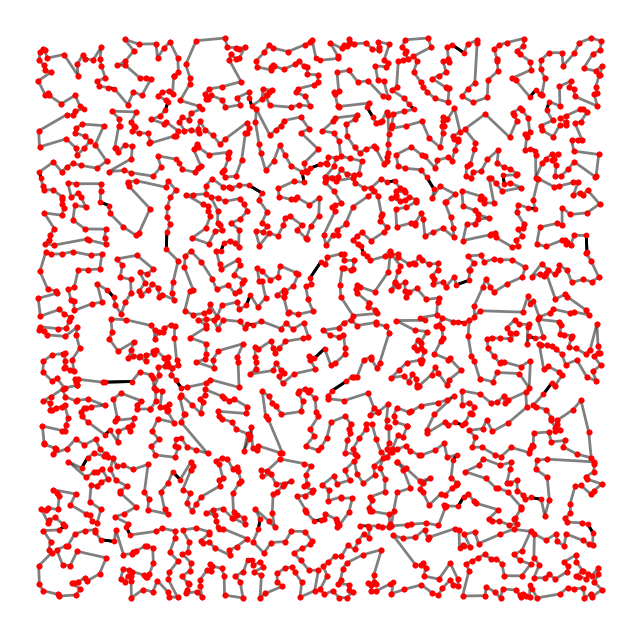

In [ ]:
plt.figure(figsize=(8,8))
addition = [(i,j) for (n,m),(i,j) in connect.items()]

Xp, Yp = [] ,[]
for (i,j) in toplot:
  Xp.append(data[i][0])
  Xp.append(data[j][0])
  Yp.append(data[i][1])
  Yp.append(data[j][1])
  if (i,j) not in addition:
    rn = min(32, data[i][2])

    kk = KOLORS[rn]
    kk = 'r'
    plt.plot([data[i][0],data[j][0]],[data[i][1],data[j][1]], lw=2, zorder=-1, c='k', alpha=0.5)
    plt.scatter(data[i][0],data[i][1], zorder=2, c=kk, s= 10)
    plt.scatter(data[j][0],data[j][1], zorder=2, c=kk, s= 10)
  else:
    plt.plot([data[i][0],data[j][0]],[data[i][1],data[j][1]], lw=2, zorder=-1, c='k', alpha=1)



#plt.scatter(Xp,Yp, zorder=2, c='r', s= 10)
plt.axis('off')